### Table of Content
#### 1. Introduction
#### - Introduction to Quantum Computing
#### - Why Quantum Computing for Finance
#### - Qiskit Finance
#### - Mean-Variance Portfolio Optimization
#### 2. Package Installation & Import
#### - Qiskit Setup & Installation
#### - Installing Eikon API Package
#### 3. Getting Data using Eikon API & Pre-Processing
#### 4. Classical Implementation using Eigen Solver
#### 5. VQE Implementation
#### 6. QAOA Implementation
#### 7. Conclusion
#### 8. References

# 1. Introduction
Financial institutions are testing early use-cases of Quantum Technologies for NP hard problems which are uncertain or difficult to optimize. In this article, we are going to make use <b>of</b> quantum computers for building an optimal portfolio out of <b>FAANG</b> (Facebook, Apple, Amazon, Netflix, Google) stocks using mean-variance portfolio optimization technique. Initially we will talk about basics of Quantum Computing and Portfolio Optimization. Later on we will jump to coding- where we will do initial setup, load data from Eikon API, do some basic analysis, implement mean-variance portfolio technique classically and then using VQE & QAOA.

## Introduction to Quantum Computing
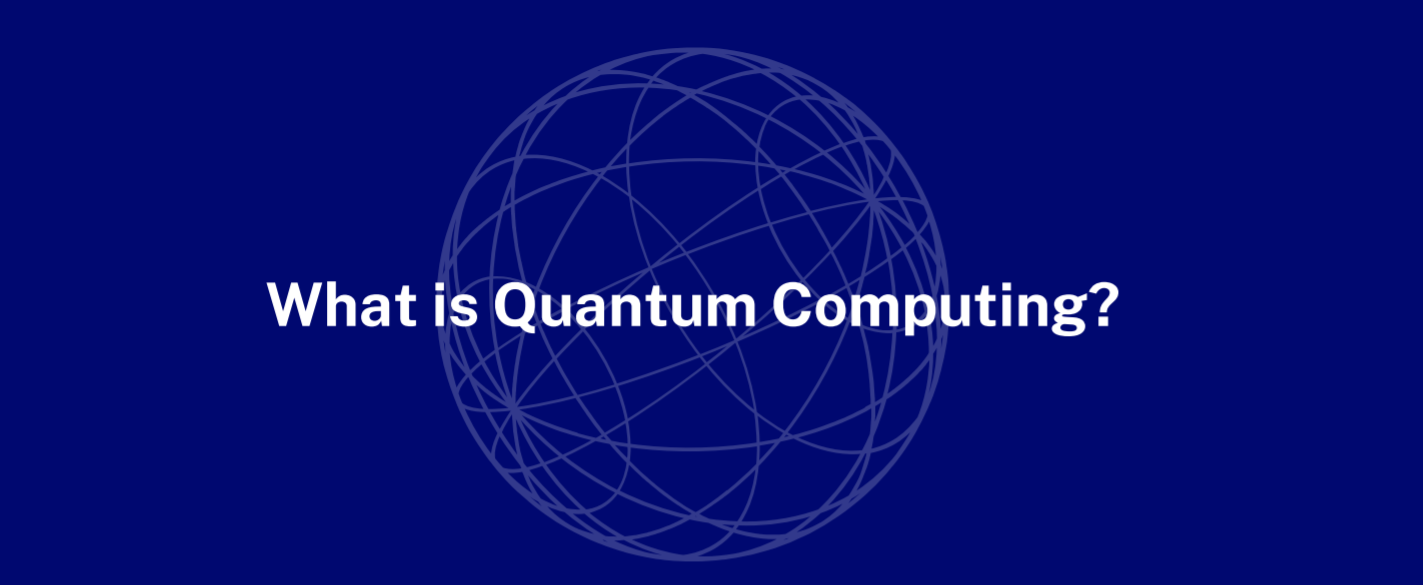

Quantum computing is an area of computing that focuses on developing computer technology based on quantum theory's concepts (which explains the behaviour of energy and material at the atomic and subatomic levels).

Computers used today can only encode information in bits that take the value of 1 or 0, whereas in Quantum computing, we have quantum bits, called as qubits. QuBits can be in the state 0,1 & 0|1 (superposition- existing simultaneously with a certain probability across the spectrum of 0 to 1). This helps us achieve parallel programming and hence solve computations at a exponential speed compared to a normal computer. When qubits are measured, it will either collapse to 0 or 1.

So, in short a Quantum Computer makes use of quantum mechanical phenomena such as superposition and entanglement to perform computation.

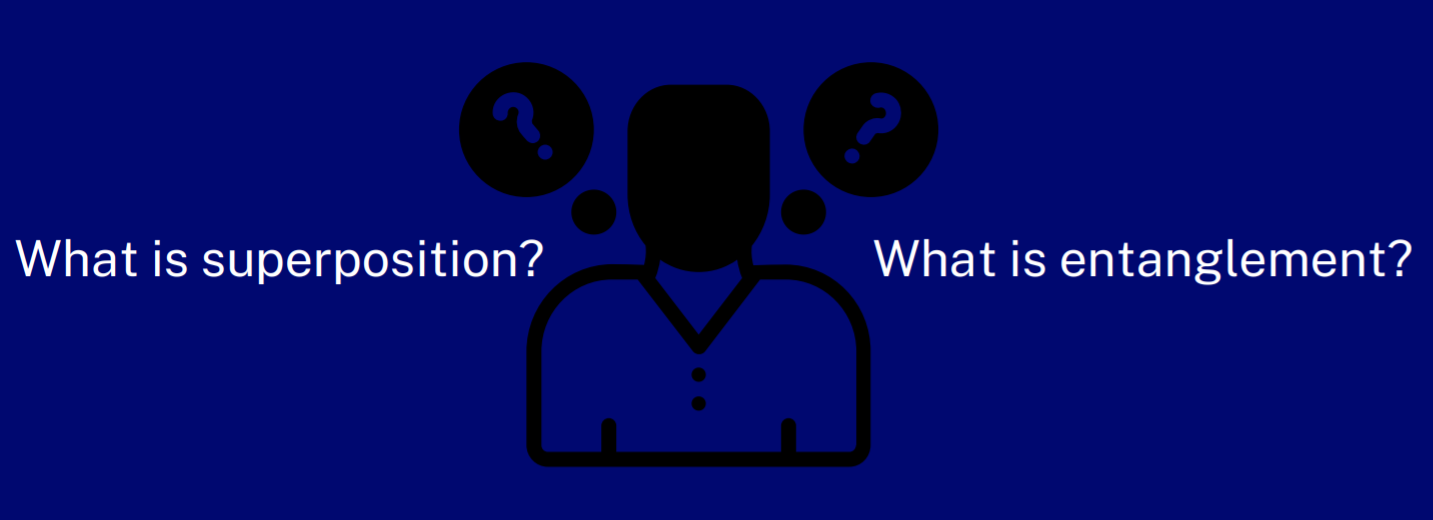

### Superposition
A quantum system's ability to be in numerous states at the same time until it is measured is known as <b>superposition</b>. 

<b>To illustrate this Schrodinger posited a thought experiment</b> involving putting a cat and a sealed bottle of poison in a closed box together. The question now is, how would we know if the poison bottle broke open and the cat died or if the cat is still alive inside the box?

### Entanglement
<b>Quantum entanglement</b> is a quantum mechanical phenomenon in which the quantum states of two or more objects must be described in relation to each other, even if the individual objects can be spatially separated.

One of the most commonly used qubits is photon spins. A photon can either have spin up (one state) or spin down (zero states). If we have two entangled photons, then they must have opposite spins, if one is up then the other must be down.

In this article, we will explore about Portfolio Optimization problem and see how we can solve them with Qiskit.

## Why Quantum Computing for Finance

<b>Applications of QC in finance are currently being developed and worked on. Two such applications are:</b>
 
<b>Portfolio Optimization</b>- It is an optimization problem where we have a collection of assets and we want to select these assets that maximize our return but at the same time minimize the risk. These optimization problems can be formulated as quadratic programs which are well studied classically and they are very difficult to solve. 

<b>Option Pricing</b>- It is an estimation problem and these problems mostly rely on monte carlo simulations. If the function that we want to estimate is a difficult function, then classical computers will have a very slow convergence.

With a quantum computer, there are two possible approaches with which we hope to improve optimization algorithms that we can run in the `near-term` devices that we already have today and `fault-tolerant` devies in the next couple of years. 

Heuristic algorithms like <b>Variational Quantum Eigensolver</b> (Variational algorithm) have a classical and a quantum processor, so it depends on the problem that we want to solve and the models that we have and there's no speed up that we can prove here right now.

On the other hand if we look into the future when we get fault-tolerant quantum computers then there are algorithms based on Grover Search like <b>Grover Adaptive Search</b> where we can expect quadratic speed up.

For <b>Monte Carlo Simulations</b>, there's a quantum algorithm called the <b>Quantum Amplitude Estimation</b> algorithm with which we can also expect a quadratic speed up.

### Qiskit Finance

Let's have an short overview of what Qiskit Finance is, and what sub-modules it contains

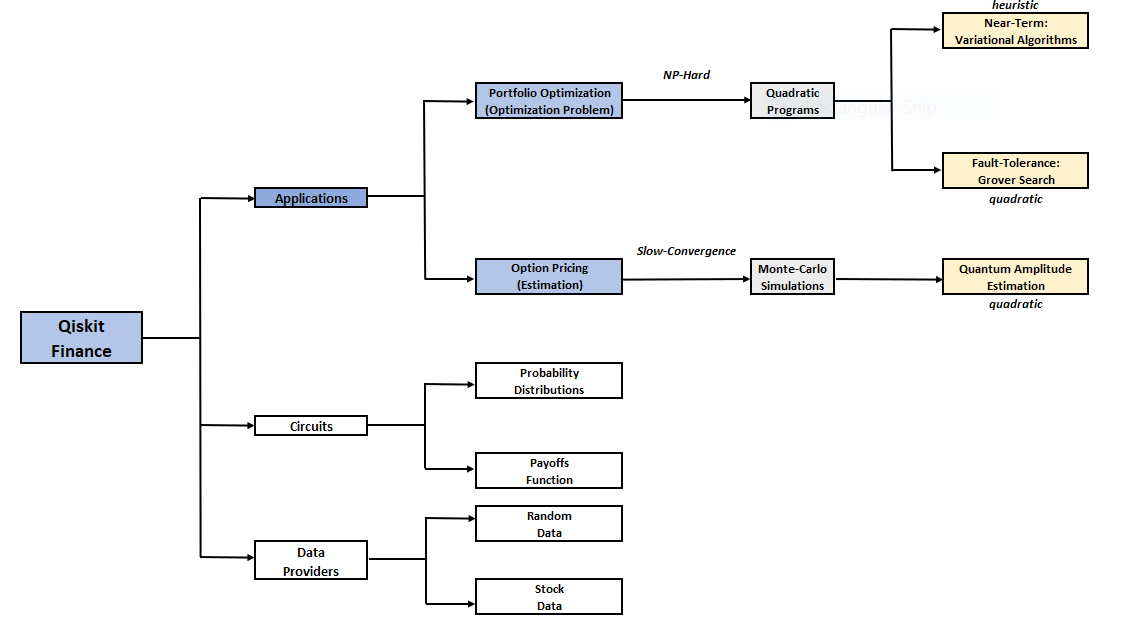

Two branches of applications that we can see in the above diagram:

    - Portfolio Optimization
    - Option Pricing   
It gives us the tools to solve optimization and option pricing problems like the european call option or fixed-income pricing.

It also have the sub modules containing circuits and tools to build these quantum circuits that we need to run these algorithms.

We also have some modules for data providers where we can load random data or we can even load historical stock market data to test our algorithms. Here we have extended the historical data loading module to load data from Eikon API.

## Mean-Variance Portfolio Optimization
<b>Portfolio optimization</b> is a process of selecting best assets out of the available options in order to maximise the return and minimize the risk. For more info read [here](https://developers.refinitiv.com/en/article-catalog/article/portfolio-optimisation-ii).
First we need to find the best performing assets and then decide how much need to be invested in each of the selected assets.<br>
Some of the basic terms before moving ahead:<br>
<b>Risk</b>: Deviation of the return on investment from the expected level.<br>
<b>Return</b>: Reward of investment to a given asset.<br>
<b>Portfolio</b>: Collection of assets such as stocks, currencies, bonds, etc.<br>

There are different strategies/frameworks for Portfolio Optimization, however in this article we are going to use <b>mean-variance portfolio theory</b> also known as <b>Modern Portfolio Theory</b> (MPT) which is a very basic one but good to explore use case on quantum computers and it evaluate assets in two dimensions that is risk and return. Using MPT we will find the assets to invest in out of available options, in our case which is FAANG.

Let's see how we will be solving the mean-variance portfolio optimization problem for $n$ assets:

$$\begin{aligned}
\min_{x \in \{0, 1\}^n}  q x^T \Sigma x - \mu^T x\\
\text{subject to: } 1^T x = B
\end{aligned}$$

where we use the following notation:

- $x \in \{0, 1\}^n$ denotes the vector of binary decision variables, which indicate which assets to pick ($x[i] = 1$) and which not to pick ($x[i] = 0$),
- $\mu \in \mathbb{R}^n$ defines the expected returns for the assets,
- $\Sigma \in \mathbb{R}^{n \times n}$ specifies the covariances between the assets,
- $q > 0$ controls the risk appetite of the decision maker,
- and $B$ denotes the budget, i.e. the number of assets to be selected out of $n$.

We assume that one has to select exactly $B$ assets.

The equality constraint $1^T x = B$ is mapped to a penalty term $(1^T x - B)^2$ which is scaled by a parameter and subtracted from the objective function. 
The resulting problem can be mapped to a Hamiltonian whose ground state corresponds to  the optimal solution.
In this notebook, we will see how to use the Variational Quantum Eigensolver (VQE) or the Quantum Approximate Optimization Algorithm (QAOA) to find the optimal solution for a given set of parameters.

##### Example of Mean-Variance Analysis
It is possible to calculate which investments have the greatest variance and expected return. Assume the following investments are in an investor's portfolio:

Asset A: Amount = $1000 with expected return of 5%

Asset B: Amount = $3000 with expected return of 10%

In a total portfolio value, the weight of each asset is 25% and 75% respectively.

Therefore, the total expected return of the portfolio is the weight of the asset in the portfolio multiplied by the expected return:

Portfolio expected return = (25% * 5%) + (75% * 10%) = 8.75%. Portfolio variance is more complicated to calculate because it is not a simple weighted average of the investments' variances. The correlation between the two investments is 0.65. The standard deviation, or square root of variance, for Investment A is 7%, and the standard deviation for Investment B is 14%. 

In this example,

Portfolio variance = (25% ^ 2 * 7% ^ 2) + (75% ^ 2 * 14% ^ 2) + (2 * 25% * 75% * 7% * 14% * 0.65) = 0.0137

The portfolio standard deviation is the square root of the answer: 11.71%.

#### Number of Possible Combination of Assets for FAANG
Since we have 5 assets in the list from which we are going to find optimal asset names to be invested in, we will be making use of 5 qubits, where each qubit will be mapped with one asset. 
A 5-qubit system uses combinations of numbers up to five place values (11111) and each place value will be representing one of the asset. 

There are 2^5 (32) states (possible combinations of assets): <br>
`00000`, `00001`, `00010`, `00100`, `01000`, `10000`, `00011`, `00110`, `01100`, `11000`, `10001`, `10100`, `00101`, `01010`, `01001`, `10010`, `00111`, `01110`, `11100`, `11001`, `10011`, `10101`, `01011`, `01101`, `10110`, `11010`, `01111`, `11110`, `10111`, `11011`, `11101`, and `11111`.

We will be observing the probabilities and optimal values of these states when running it on classical and quantum computers.

#### Current Limitations
- Quantum Systems with lesser number of qubit available publicly
- Fault-tolerant Quantum Systems to be built for quadratic speed up
- More efficient ways to load classical data into quantum states and perform fast computations with them
- Effective quantum error rate of the hardware should be very small, in order to ensure that no errors occur in the applications, however  quantum error correction algorithm can be used to lower this

# 2. Environment Setup & Package Installation

Assuming you already have anaconda installed or python supported IDE To execute below codes, we need to install following modules:<br>

### Qiskit Setup & Installation
<b>Qiskit</b>: An open-source SDK for working with quantum computers at the level of circuits, algorithms, and application modules. For more info, visit [here](https://qiskit.org/)<br>

<b> Qiskit Finance</b>: It contains uncertainty components for stock/securities problems, Ising translators for portfolio optimizations and data providers to source real or random data to finance experiments. For more info, visit [here](https://github.com/Qiskit/qiskit-finance)<br>

Execute the below cells to install Qiskit and it's components:

In [1]:
# ! pip install qiskit qiskit-finance==0.2.1

Check version of Qiskit and it's installed components

In [2]:
import warnings
warnings.filterwarnings("ignore")
import qiskit.tools.jupyter
%qiskit_version_table

C:\Users\U6086373\Anaconda3\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


#### [Optional] Setup token to run the experiment on a real device
If you would like to run the experiment on a real device, you need to setup your account first. You can get your api token from [here](https://quantum-computing.ibm.com/)

Note: If you do not store your token yet, use `IBMQ.save_account('MY_API_TOKEN')` to store it first.

In [3]:
# from qiskit import IBMQ
# IBMQ.save_account('MY_API_TOKEN')

### Eikon API Installation
<b>Eikon API</b>: It allows to access data directly from Eikon or Refinitv Workspace using python giving capabilities to data scientists, quants to prototype or productionize solutions.For more info, visit [here](https://developers.refinitiv.com/en/api-catalog/eikon/eikon-data-api)

Execute the below cells to install Eikon:

In [4]:
# ! pip install eikon

Check version of Eikon API

In [5]:
import eikon as ek
print("Eikon version: ", ek.__version__)

Eikon version:  1.1.12


#### Setup Eikon API
I have saved my Eikon Data API key in a file for security reason and not displaying here in notebook.

In [6]:
eikon_key = open("eikon.txt","r")
ek.set_app_key(str(eikon_key.read()))
eikon_key.close()

Other packages which needs to be installed if not installed already- <b>numpy</b>, <b>pandas</b>, <b>matplotlib</b>, <b>seaborn</b>

### Importing Packages

In [8]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
from qiskit import Aer
from qiskit_finance.data_providers._base_data_provider import BaseDataProvider
from qiskit.finance.applications.ising import portfolio
from qiskit.circuit.library import TwoLocal
from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.aqua.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.aqua.components.optimizers import COBYLA

## 3. Getting Data using Eikon API & Pre-Processing

#### Defining EikonDataProvider class for Loading Data as needed by Qiskit
We will inherit BaseDataProvider from data provider module of Qiskit Finance to extend it's functionality of getting data from Eikon API in desired format and make use of existing functions.

In [9]:
class EikonDataProvider(BaseDataProvider):
    """
    The abstract base class for Eikon data_provider.
    """
    def __init__(self, stocks_list, start_date, end_date):
        '''
        stocks -> List of interested assets
        start -> start date to fetch historical data
        end -> 
        '''
        super().__init__()
        self._stocks = stocks_list
        self._start = start_date
        self._end = end_date
        self._data = []
        self.stock_data = pd.DataFrame()
        
    def run(self):
        self._data = []
        stocks_notfound = []
        stock_data = ek.get_timeseries(self._stocks,
                  start_date=self._start, 
                  end_date=self._end, 
                  interval='daily',
                  corax='adjusted')
        for ticker in self._stocks:
            stock_value = stock_data[ticker]['CLOSE']
            self.stock_data[ticker] = stock_data[ticker]['CLOSE']
            if stock_value.dropna().empty:
                stocks_notfound.append(ticker)
            self._data.append(stock_value)

### Initializing Required Parameters

In [10]:
# List of stocks 
stock_list = ['FB.O', 'AAPL.O', 'AMZN.O', 'NFLX.O', 'GOOGL.O']

# Start Date
start_date = datetime.datetime(2019,6,10)

# End Date
end_date = datetime.datetime(2021,10,20)

# Set number of equities to the number of stocks
num_assets = len(stock_list)

# Set the risk factor
risk_factor = 0.7

# Set budget
budget = 2

# Scaling of budget penalty term will be dependant on the number of assets
penalty = num_assets

### Getting data from Eikon API using EikonDataProvider class

In [11]:
data = EikonDataProvider(stocks_list = stock_list, start_date=start_date, end_date=end_date)
data.run()

In [12]:
# Top 5 rows of data 
df = data.stock_data
df.head()

,FB.O,AAPL.O,AMZN.O,NFLX.O,GOOGL.O
Date,,,,,
2019-06-10,174.82,48.145,1860.63,352.01,1082.76
2019-06-11,178.1,48.7025,1863.7,351.27,1081.04
2019-06-12,175.04,48.5475,1855.32,345.56,1079.1
2019-06-13,177.47,48.5375,1870.3,343.43,1091.01
2019-06-14,181.33,48.185,1869.67,339.73,1086.3


In [46]:
df.describe()

,FB.O,AAPL.O,AMZN.O,NFLX.O,GOOGL.O
count,598.000000,598.000000,598.000000,598.000000,598.000000
mean,252.526329,99.912180,2689.797375,444.810042,1721.776079
std,60.343144,33.525327,670.814485,99.047054,532.006074
min,146.010000,48.145000,1676.610000,254.590000,1054.130000
25%,197.922500,67.259375,1901.160000,350.782500,1300.570000
50%,252.245000,110.071250,3057.400000,484.825000,1512.160000
75%,293.215000,128.882500,3267.925000,520.180000,2088.182500
max,382.180000,156.690000,3731.410000,639.100000,2904.310000


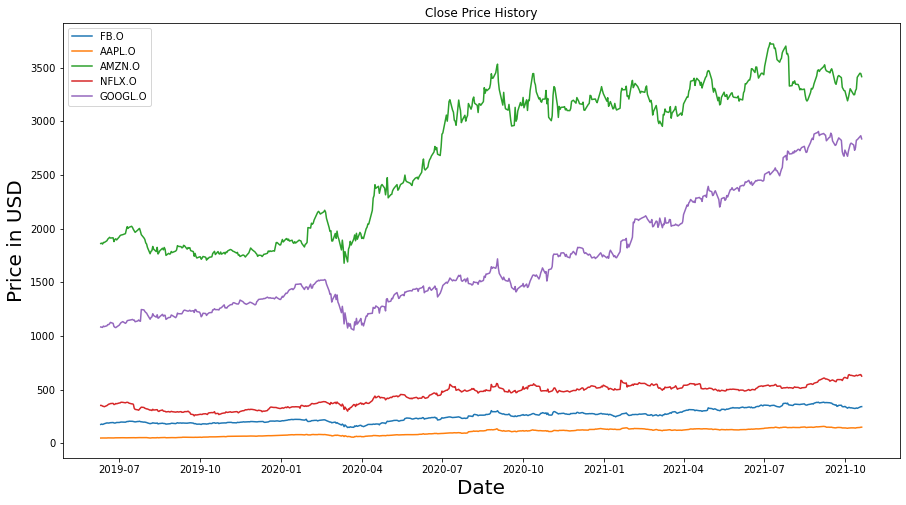

In [47]:
# Closing Price History
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df)
plt.title('Close Price History')
plt.xlabel('Date',fontsize =20)
plt.ylabel('Price in USD',fontsize = 20)
ax.legend(df.columns.values)
plt.show()

In [48]:
# # Mean value of each equities
# mean_vector = data.get_mean_vector()

# sns.barplot(y=mean_vector, x = stock_list)
# plt.show()

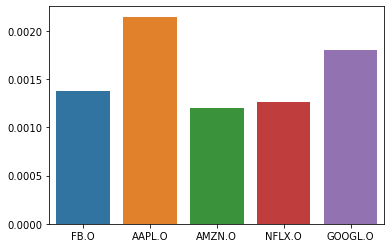

In [49]:
mu = data.get_period_return_mean_vector()

sns.barplot(y=mu, x = stock_list)
plt.show()

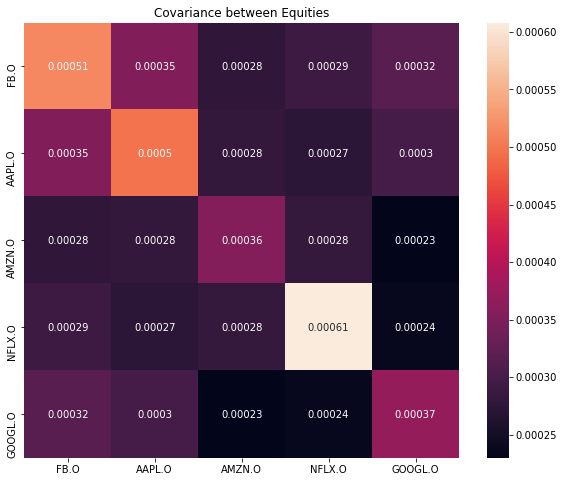

In [50]:
# Covariance Matrix
sigma = data.get_period_return_covariance_matrix()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(sigma, mask=np.zeros_like(sigma, dtype=np.bool), annot=True,
            square=True, ax=ax, xticklabels=stock_list, yticklabels=stock_list)
plt.title("Covariance between Equities")
plt.show()

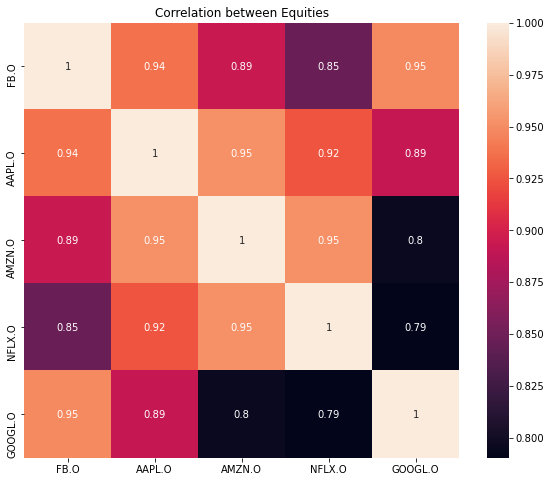

In [51]:
# Correlation Matrix
corr = df.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), annot=True,
            square=True, ax=ax, xticklabels=stock_list, yticklabels=stock_list)
plt.title("Correlation between Equities")
plt.show()

Let's explore the data by plotting a 5*5 matrix with the correlation of the returns between the five stocks. We can see that the stocks' returns are strongly correlated. At the same time, we plotted the histogram of the returns in the diagonal of the matrix. We can estimate that the returns are not distributed normally due to the leptokurtic shape of the histogram. At the same time, we can see that the stocks' returns are strongly correlated.

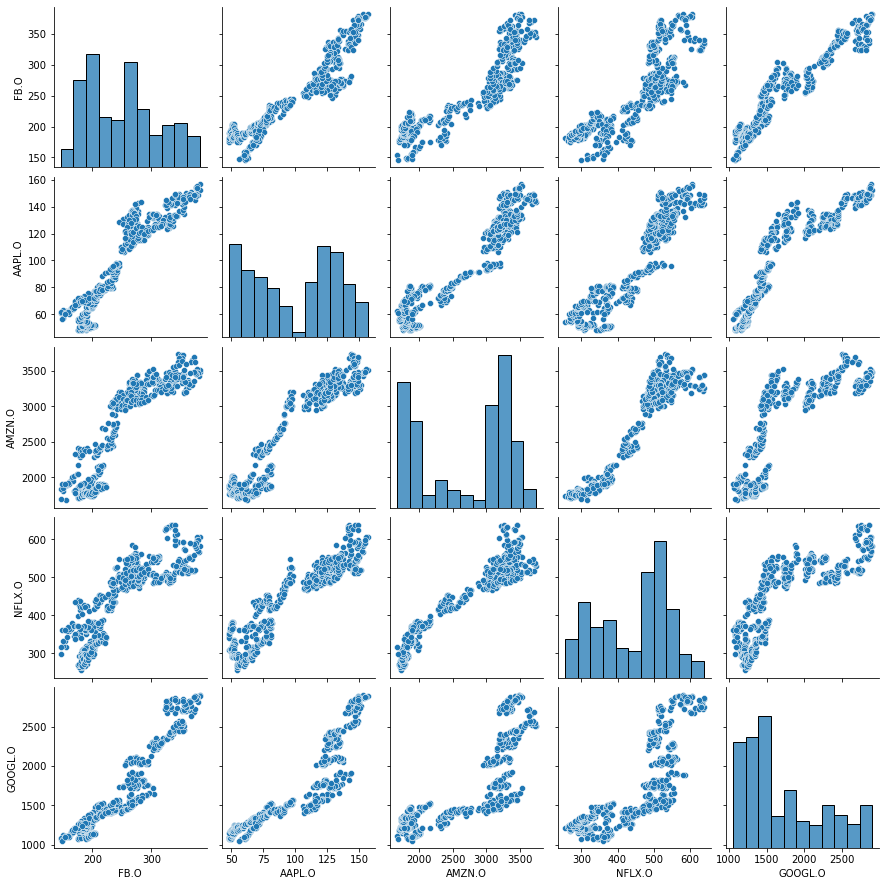

In [52]:
sns.pairplot(df)
plt.show()

In [1]:
# returns = np.log(df/df.shift(1)).dropna()
# returns.head()

In [2]:
# sns.pairplot(returns)
# plt.show()

Here an Operator instance is created for our Hamiltonian. In this case the paulis are from an Ising Hamiltonian translated from the portfolio problem.

In [55]:
# Retrieve Hamiltonian
qubitOp, offset = portfolio.get_operator(mu, sigma, risk_factor, budget, penalty)

#### Utility Functions

In [56]:
def index_to_selection(i, num_assets):
    s = "{0:b}".format(i).rjust(num_assets)
    x = np.array([1 if s[i]=='1' else 0 for i in reversed(range(num_assets))])
    return x

def selection_to_picks(num_assets, selection):
    purchase = []
    for i in range(num_assets):
        if selection[i] == 1:
            purchase.append(stock_list[i])
    return purchase

# def print_result(result):
#     selection = sample_most_likely(result.eigenstate)
#     value = portfolio.portfolio_value(selection, mu, sigma, q, budget, penalty)
#     print(f"!!! Optimal: portfolio holdings !!!")
#     return selection

def print_result(result):
    selection = sample_most_likely(result.eigenstate)
    value = portfolio.portfolio_value(selection, mu, sigma, risk_factor, budget, penalty)
    print('Optimal: selection {}, value {:.4f}'.format(selection, value))

    eigenvector = result.eigenstate if isinstance(result.eigenstate, np.ndarray) else result.eigenstate.to_matrix()
    probabilities = np.abs(eigenvector)**2
    i_sorted = reversed(np.argsort(probabilities))
    print('\n----------------- Full result ---------------------')
    print('selection\tvalue\t\tprobability')
    print('---------------------------------------------------')
    states, values, probs = [], [], []
    for i in i_sorted:
        x = index_to_selection(i, num_assets)
        value = portfolio.portfolio_value(x, mu, sigma, risk_factor, budget, penalty)
        probability = probabilities[i]
        print('%10s\t%.4f\t\t%.4f' %(x, value, probability))
        states.append(''.join(str(i) for i in x))
        values.append(value)
        probs.append(probability)
    return selection, states, values, probs

## 4. Classical Implementation using Eigen Solver

### Classical Eigensolver
Lets solve the problem. First classically…

We can now use the Operator we built above without regard to the specifics of how it was created. We set the algorithm for the NumPyMinimumEigensolver so we can have a classical reference. The problem is set for ‘ising’. Backend is not required since this is computed classically not using quantum computation. The result is returned as a dictionary.

In [57]:
def numpyEigensolver(qubitOp):
    selections = []
    exact_eigensolver = NumPyMinimumEigensolver(qubitOp)
    result = exact_eigensolver.run()
    selection, state, values, probabilities = print_result(result)
    print(selection_to_picks(num_assets, selection))
    return state, values, probabilities

In [58]:
#Classical Benchmark
%time
state, values, probabilities = numpyEigensolver(qubitOp) # ['FB.O', 'AAPL.O', 'AMZN.O', 'NFLX.O', 'GOOGL.O']

Wall time: 0 ns
Optimal: selection [0 1 0 0 1], value -0.0029

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 1 0 0 1]	-0.0029		1.0000
[1 1 1 1 1]	44.9978		0.0000
[0 1 1 1 0]	4.9976		0.0000
[1 0 0 0 0]	4.9990		0.0000
[0 1 0 0 0]	4.9982		0.0000
[1 1 0 0 0]	-0.0023		0.0000
[0 0 1 0 0]	4.9991		0.0000
[1 0 1 0 0]	-0.0016		0.0000
[0 1 1 0 0]	-0.0024		0.0000
[1 1 1 0 0]	4.9975		0.0000
[0 0 0 1 0]	4.9992		0.0000
[1 0 0 1 0]	-0.0014		0.0000
[0 1 0 1 0]	-0.0023		0.0000
[1 1 0 1 0]	4.9976		0.0000
[0 0 1 1 0]	-0.0014		0.0000
[1 0 1 1 0]	4.9984		0.0000
[1 1 1 1 0]	19.9979		0.0000
[0 1 1 1 1]	19.9971		0.0000
[0 0 0 0 1]	4.9985		0.0000
[1 0 0 0 1]	-0.0021		0.0000
[1 1 0 0 1]	4.9970		0.0000
[0 0 1 0 1]	-0.0022		0.0000
[1 0 1 0 1]	4.9977		0.0000
[0 1 1 0 1]	4.9969		0.0000
[1 1 1 0 1]	19.9972		0.0000
[0 0 0 1 1]	-0.0020		0.0000
[1 0 0 1 1]	4.9978		0.0000
[0 1 0 1 1]	4.9970		0.0000
[1 1 0 1 1]	19.9973		0.0000
[0 0 1

In [3]:
# f, ax = plt.subplots(figsize=(20, 8))
# optimized_value = sns.barplot(state, values)
# for item in optimized_value.get_xticklabels():
#     item.set_rotation(45)
# plt.title("Optimized Values of Each Possible Combination of Assets", fontsize=25) #Lower the value is, best optimal set of asset it is
# plt.xlabel('Possible Combinations of Assets',fontsize =20)
# plt.ylabel('Optimized Values',fontsize = 20)
# plt.show()

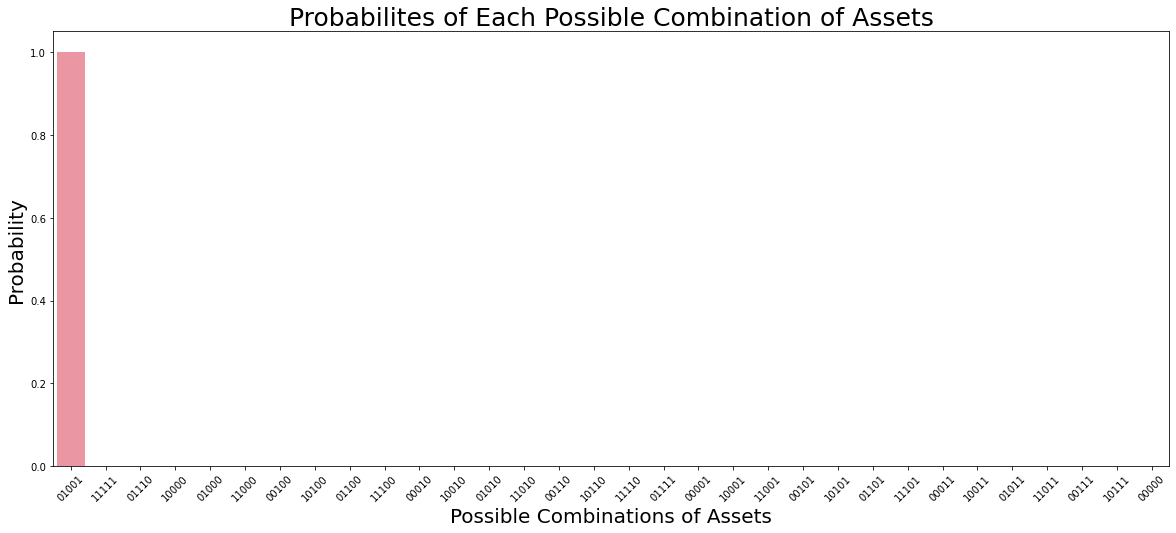

In [60]:
f, ax = plt.subplots(figsize=(20, 8))
optimized_value = sns.barplot(state, probabilities)
for item in optimized_value.get_xticklabels():
    item.set_rotation(45)
plt.title("Probabilites of Each Possible Combination of Assets", fontsize=25) # Probability of Max Return at given risk level
plt.xlabel('Possible Combinations of Assets',fontsize =20)
plt.ylabel('Probability',fontsize = 20)
plt.show()

## 5. VQE Implementation

#### First let's understand what is VQE
The Variational Quantum Eigensolver (VQE) algorithm is one of the essential algorithms to learn in the NISQ era. It makes the idea of the famous Quantum Phase Estimation Algorithm usable with the small number of qubits Quantum Computers currently possess. VQE presents us with a hybrid quantum-classical approach to tackle the current hardware limits.

VQE exploits the fact that the ground state energy is always less than or equal to the expectation value of the Hamiltonian of the state. Hence, by minimizing the expectation value of the Hamiltonian, we can find the upper bound of the ground state energy. And by varying the state, we can find the wavefunction on which the value of the expectation value is the lowest.

VQE, in a straightforward language, consists of three steps:
* Converting the Hamiltonian into Pauli basis
* Creation of a variational form
* Parameter Optimization

Goal: Find ground state $|\Psi\rangle$ of the Hamiltonian $H$.

Idea: Choose model $|\phi(\theta)\rangle$ that can approximate $|\Psi\rangle$ well and minimize the energy

$$
    \theta^* = \text{argmin}_\theta E(\theta) = \text{argmin}_\theta \langle\phi(\theta)|H|\phi(\theta)\rangle 
$$

For more info, visit [here](https://pennylane.ai/qml/demos/tutorial_vqe.html)

We can now use the Variational Quantum Eigensolver (VQE) to solve the problem. We will specify the optimizer and variational form to be used.

In [61]:
def vqe(qubitOp):
    backend = Aer.get_backend('statevector_simulator') # You can switch to different backends by providing the name of backend.
    seed = 50
    cobyla = COBYLA()
    cobyla.set_options(maxiter=1000)
    ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=3, entanglement='full')
    vqe = VQE(qubitOp, ry, cobyla)
    vqe.random_seed = seed
    quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)
    result = vqe.run(quantum_instance)
    selection, state, values, probabilities = print_result(result)
    print(selection_to_picks(num_assets, selection))
    return state, values, probabilities

In [73]:
# Variational Quantum EigenSolver
%time
state, values, probabilities = vqe(qubitOp) # ['FB.O', 'AAPL.O', 'AMZN.O', 'NFLX.O', 'GOOGL.O']

Wall time: 0 ns
Optimal: selection [0. 1. 0. 0. 1.], value -0.0029

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 1 0 0 1]	-0.0029		0.9653
[0 0 0 1 1]	-0.0020		0.0295
[1 0 0 0 1]	-0.0021		0.0009
[1 0 0 1 1]	4.9978		0.0008
[1 1 0 0 0]	-0.0023		0.0008
[0 0 1 0 1]	-0.0022		0.0007
[1 1 0 1 0]	4.9976		0.0006
[0 1 1 0 0]	-0.0024		0.0005
[0 0 1 1 1]	4.9977		0.0002
[1 0 1 0 1]	4.9977		0.0002
[1 1 1 0 0]	4.9975		0.0001
[0 1 1 1 0]	4.9976		0.0001
[0 0 1 0 0]	4.9991		0.0001
[0 1 0 1 0]	-0.0023		0.0001
[1 1 0 0 1]	4.9970		0.0000
[0 1 0 0 0]	4.9982		0.0000
[1 0 0 1 0]	-0.0014		0.0000
[0 0 0 0 1]	4.9985		0.0000
[1 0 1 1 1]	19.9979		0.0000
[1 0 0 0 0]	4.9990		0.0000
[0 0 1 1 0]	-0.0014		0.0000
[1 0 1 1 0]	4.9984		0.0000
[1 1 1 1 0]	19.9979		0.0000
[1 0 1 0 0]	-0.0016		0.0000
[0 1 0 1 1]	4.9970		0.0000
[0 0 0 1 0]	4.9992		0.0000
[0 0 0 0 0]	20.0000		0.0000
[1 1 1 0 1]	19.9972		0.0000
[0 1 1 1 1]	19.9971		0.0000
[

In [5]:
# f, ax = plt.subplots(figsize=(20, 8))
# optimized_value = sns.barplot(state, values)
# for item in optimized_value.get_xticklabels():
#     item.set_rotation(45)
# plt.title("Optimized Values of Each Possible Combination of Assets", fontsize=25) #Lower the value is, best optimal set of asset it is
# plt.xlabel('Possible Combinations of Assets',fontsize =20)
# plt.ylabel('Optimized Values',fontsize = 20)
# plt.show()

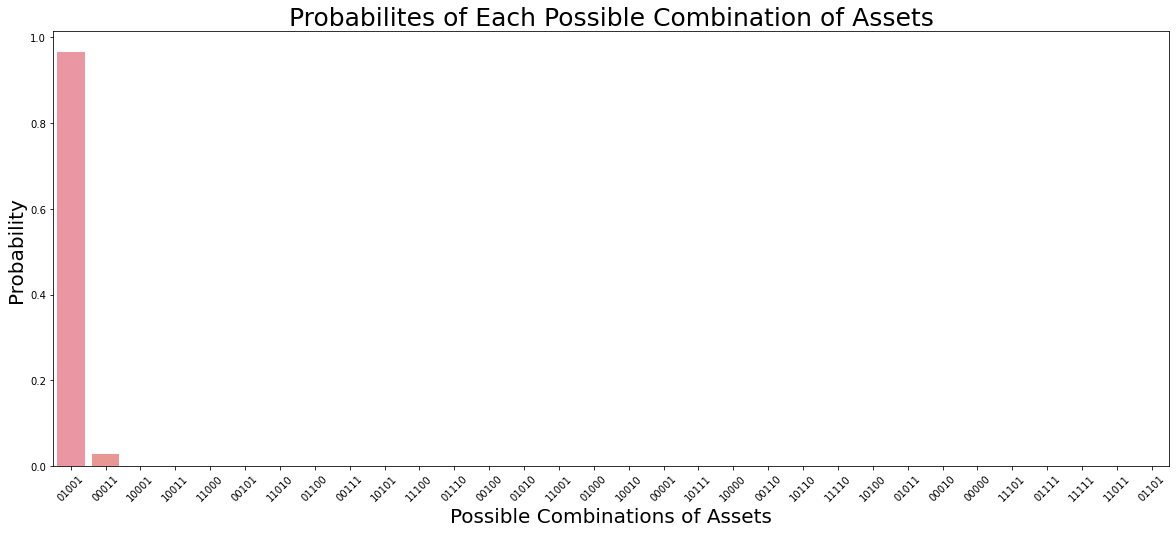

In [75]:
f, ax = plt.subplots(figsize=(20, 8))
optimized_value = sns.barplot(state, probabilities)
for item in optimized_value.get_xticklabels():
    item.set_rotation(45)
plt.title("Probabilites of Each Possible Combination of Assets", fontsize=25) # Probability of Max Return at given risk level
plt.xlabel('Possible Combinations of Assets',fontsize =20)
plt.ylabel('Probability',fontsize = 20)
plt.show()

## 6. QAOA Implementation

The Quantum Approximate Optimization Algorithm (QAOA) is a widely-studied method for solving combinatorial optimization problems on NISQ devices. The applications of QAOA are broad and far-reaching, and the performance of the algorithm is of great interest to the quantum computing research community.

We also show here a result using the Quantum Approximate Optimization Algorithm (QAOA). This is another variational algorithm and it uses an internal variational form that is created based on the problem.

For more info, visit [here](https://pennylane.ai/qml/demos/tutorial_qaoa_intro.html)

In [65]:
def qaoa(qubitOp):
    backend = Aer.get_backend('statevector_simulator') # You can switch to different backends by providing the name of backend.
    seed = 50
    cobyla = COBYLA()
    cobyla.set_options(maxiter=1000)
    qaoa = QAOA(qubitOp, cobyla, 3)
    qaoa.random_seed = seed
    quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)
    results= qaoa.run(quantum_instance)
    selection, state, values, probabilities = print_result(results)
    print(selection_to_picks(num_assets, selection))
    return state, values, probabilities

In [77]:
# QAOA (Quantum Approximate Optimization Algorithm)
%time
state, values, probabilities = qaoa(qubitOp) # ['FB.O', 'AAPL.O', 'AMZN.O', 'NFLX.O', 'GOOGL.O']

Wall time: 0 ns
Optimal: selection [0. 1. 0. 0. 1.], value -0.0029

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 1 0 0 1]	-0.0029		0.0947
[0 1 1 0 0]	-0.0024		0.0946
[1 1 0 0 0]	-0.0023		0.0946
[0 1 0 1 0]	-0.0023		0.0946
[0 0 1 0 1]	-0.0022		0.0946
[1 0 0 0 1]	-0.0021		0.0946
[0 0 0 1 1]	-0.0020		0.0946
[1 0 1 0 0]	-0.0016		0.0945
[1 0 0 1 0]	-0.0014		0.0945
[0 0 1 1 0]	-0.0014		0.0945
[0 0 0 1 0]	4.9992		0.0037
[1 0 0 0 0]	4.9990		0.0037
[0 0 1 0 0]	4.9991		0.0037
[0 0 0 0 1]	4.9985		0.0037
[0 1 0 0 0]	4.9982		0.0037
[0 1 1 0 1]	4.9969		0.0034
[1 1 0 0 1]	4.9970		0.0034
[0 1 0 1 1]	4.9970		0.0034
[1 1 1 0 0]	4.9975		0.0033
[0 1 1 1 0]	4.9976		0.0033
[1 1 0 1 0]	4.9976		0.0033
[1 0 1 0 1]	4.9977		0.0033
[0 0 1 1 1]	4.9977		0.0033
[1 0 0 1 1]	4.9978		0.0033
[1 0 1 1 0]	4.9984		0.0032
[0 0 0 0 0]	20.0000		0.0009
[1 1 1 1 1]	44.9978		0.0007
[1 1 1 1 0]	19.9979		0.0002
[1 0 1 1 1]	19.9979		0.0002
[1

In [4]:
# f, ax = plt.subplots(figsize=(20, 8))
# optimized_value = sns.barplot(state, values)
# for item in optimized_value.get_xticklabels():
#     item.set_rotation(45)
# plt.title("Optimized Values of Each Possible Combination of Assets", fontsize=25) #Lower the value is, best optimal set of asset it is
# plt.xlabel('Possible Combinations of Assets',fontsize =20)
# plt.ylabel('Optimized Values',fontsize = 20)
# plt.show()

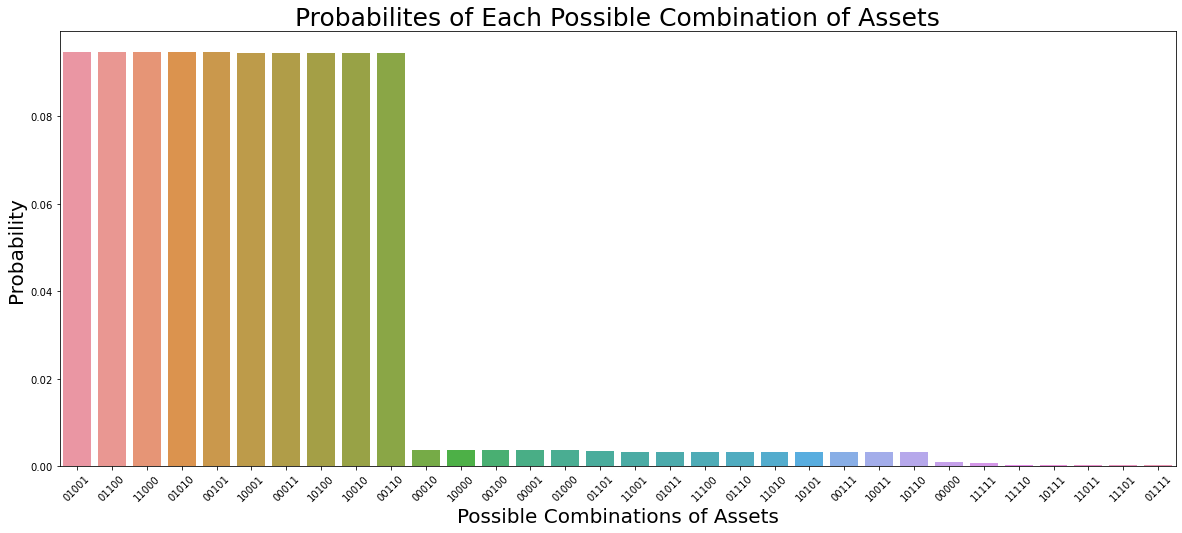

In [79]:
f, ax = plt.subplots(figsize=(20, 8))
optimized_value = sns.barplot(state, probabilities)
for item in optimized_value.get_xticklabels():
    item.set_rotation(45)
plt.title("Probabilites of Each Possible Combination of Assets", fontsize=25) # Probability of Max Return at given risk level
plt.xlabel('Possible Combinations of Assets',fontsize =20)
plt.ylabel('Probability',fontsize = 20)
plt.show()

Experiments on real quantum hardware for this problem are reported for instance in the following paper:
<br>
[Improving Variational Quantum Optimization using CVaR. Barkoutsos et al. 2019.](https://arxiv.org/abs/1907.04769)

## 7. Conclusion
Portfolio optimization is just one of the many applications that can be solved using Quantum Computers. As we can observe in above cells, output from <b>Classical EigenSolver</b> matches with the output of <b>VQE</b> and <b>QAOA</b> implementation. 
Quantum computers are expected to have substantial impact on the Finance industry, as they will eventually be able to solve certain problems considerably faster than the best known classical algorithms.

Currently, it is a major challenge to determine when this impact will occur for each application, and, in fact, one of the most pressing challenges is to redesign quantum algorithms in order to both considerably reduce the quantum hardware requirements and at the same time keep their provable impact.

I hope this article gives the reader a good start in the exploration of the wonderful field of research on portfolio construction and optimization. Advances in quantum algorithms together with better quantum hardware will continue to bring these applications closer to reality.

## 8. References:
* https://developers.refinitiv.com/en/article-catalog/article/portfolio-optimisation-ii
* https://qiskit.org/documentation/tutorials/finance/01_portfolio_optimization.html
* https://pennylane.ai/qml/demos/tutorial_qaoa_intro.html
* https://arxiv.org/pdf/2011.06492.pdf